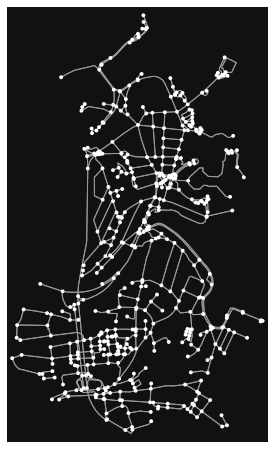

{'n': 499,
 'm': 1298,
 'k_avg': 5.202404809619239,
 'intersection_count': 397,
 'streets_per_node_avg': 2.7014028056112225,
 'streets_per_node_counts': {0: 0, 1: 102, 2: 0, 3: 348, 4: 45, 5: 2, 6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20440881763527055,
  2: 0.0,
  3: 0.6973947895791583,
  4: 0.09018036072144289,
  5: 0.004008016032064128,
  6: 0.004008016032064128},
 'edge_length_total': 74173.94200000017,
 'edge_length_avg': 57.144793528505524,
 'street_length_total': 37086.97100000007,
 'street_length_avg': 57.1447935285055,
 'street_segments_count': 649,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.068738378758216,
 'self_loop_proportion': 0.0015408320493066256,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [4]:
import osmnx as ox
import networkx as nx

%matplotlib inline
place = 'St. Julians, MALTA'
G = ox.graph_from_place(place, network_type='walk')

#plot St.Julian's
fig, ax = ox.plot_graph(ox.project_graph(G))

#print basic stats
ox.basic_stats(G)

In [5]:
#calculating area 

gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='walk')
ox.basic_stats(G, area=area)

{'n': 499,
 'm': 1298,
 'k_avg': 5.202404809619239,
 'intersection_count': 397,
 'streets_per_node_avg': 2.7014028056112225,
 'streets_per_node_counts': {0: 0, 1: 102, 2: 0, 3: 348, 4: 45, 5: 2, 6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20440881763527055,
  2: 0.0,
  3: 0.6973947895791583,
  4: 0.09018036072144289,
  5: 0.004008016032064128,
  6: 0.004008016032064128},
 'edge_length_total': 74173.94200000017,
 'edge_length_avg': 57.144793528505524,
 'street_length_total': 37086.97100000007,
 'street_length_avg': 57.1447935285055,
 'street_segments_count': 649,
 'node_density_km': 311.25044167281004,
 'intersection_density_km': 247.6281069020152,
 'edge_density_km': 46265.87616856402,
 'street_density_km': 23132.938084282003,
 'circuity_avg': 1.068738378758216,
 'self_loop_proportion': 0.0015408320493066256,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [62]:
#find the shortest path between nodes. the output figures are node IDs

origin = list(G.nodes())[0]
dest = list(G.nodes())[-1]
route = ox.shortest_path(G, origin, dest, weight='length')
route

[198453,
 246178682,
 2080354234,
 369686586,
 151091820,
 151091044,
 7622466426,
 690763698,
 151090750,
 1835435591,
 527513473,
 60965902,
 1701762042,
 8360363269]

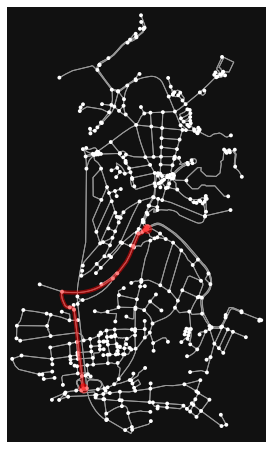

In [43]:
#what is the lotal length of the route?

length = nx.shortest_path_length(G, origin, dest, weight='length')
length

#plot 

fix, ax = ox.plot_graph_route(G, route)

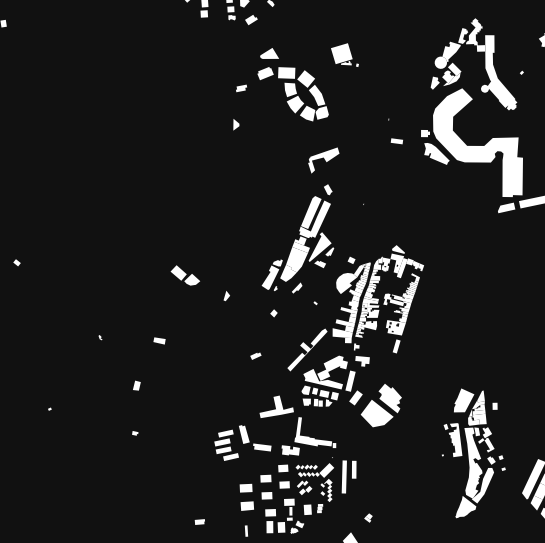

In [1]:
#Show buildings data for St.Julian's


import matplotlib.pyplot as plt
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True)
ox.__version__

# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240

# specify that we're retrieving building footprint geometries
tags = {'building': True}

point = (35.91804,14.48785)
dist = 612
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f'./{img_folder}/stj_bldgs.{extension}'
fig, ax = ox.plot_footprints(gdf_proj, bbox=bbox, color='w', filepath=fp, dpi=90,
                             save=True, show=False, close=True)
Image(fp, height=size, width=size)

